<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 1.B - Grafos </h2>
</center>
</p>
</div>


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0 - Depth-First Search</p></h2>
  
  <p>
  El objetivo de _Depth First Search_ (DFS) es el mismo que el de BFS, encontrar un camino entre dos puntos del grafo
  </p>
  
  <p>
  <a href="https://en.wikipedia.org/wiki/Depth-first_search">Aquí</a> podeis encontrar mas detalles sobre la implementación y características de este algoritmo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Grafo sobre el que buscar el camino.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El índice del nodo al que queremos llegar.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final, __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El número de nodos que se han visitado para encontrar la solución.</li>
<ul>

</p>

</div>

In [71]:
#from utils import nx
from collections import deque

def dfs(G, origen, destino):
    visited = set()
    stack = deque()
    stack.appendleft(origen)
    expanded = 0
    parent = {origen: None}
    node = origen
    
    while (node != destino):
        node = stack.popleft()
        if node not in visited:
            visited.add(node)
            expanded += 1 
            for n in G.neighbors(node):
                if n in visited:
                    continue
                stack.appendleft(n)
                parent[n] = node
               
    node = destino
    path = []
    while node != origen:
        path.append(node)
        node = parent[node]
    path.append(node)
    path.reverse()
    
    return {
        'path' : path,
        'expanded' : expanded
    }

In [77]:
G = nx.generators.barabasi_albert_graph(100, 2)
dfs(G, 1, 95)

{'path': [1, 65, 99, 45, 80, 83, 34, 8, 91, 95], 'expanded': 10}

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1 - Componentes conexos</p></h2>
  <p>
    Para este ejercicio deberéis implementar una función que identifique los distintos componentes conexos de un grafo. Esto es, agrupar todos los nodos que estén conectados por un camino.
  </p>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Objeto de tipo grafo sobre el cual buscaremos componentes conexos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _'componentes'_ __: Una lista de listas. Cada sub-lista contendrá los índices de los nodos de uno de los componentes conexos.</li>
<ul>

</p>

</div>

empezar en un nodo cualquiera, y explorarlo a traves de los vecinos. cuando se acabe, habra nodos a los que no se ha podido llegar (no es conexo). cuando pase eso se seleccionara otro nodo al azar entre los restante (no visitados) y se seguiran explorando los vecinos, así hasta llegar a explorar todos los nodos del grafo.

In [40]:
from collections import deque

def _dfs(G, origen):
    visited = set()
    stack = deque()
    stack.appendleft(origen)
    node = origen
    
    while (stack != deque([])):
        node = stack.popleft()
        if node not in visited:
            visited.add(node)
            for n in G.neighbors(node):
                if n in visited:
                    continue
                stack.appendleft(n)
    
    return visited

In [41]:
from queue import Queue
import random

def cnx(G):
    visited = []
    componentes = []
    
    while (list((set(list(G.nodes()))) - set(visited))):
        nodo = random.choice(list((set(G.nodes())) - set(visited)))        
        visited.extend(list(_dfs(G, nodo)))
        componentes.append(list(_dfs(G,nodo)))
          

    return componentes

F:\Descargas\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


[[0, 1, 2, 3, 4, 5, 6, 7, 8],
 [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
 [24, 25, 23],
 [27, 28],
 [26]]

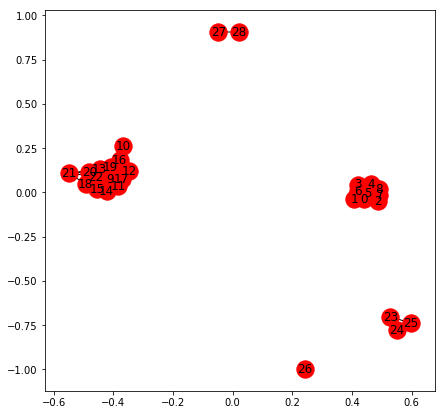

In [42]:
%matplotlib inline
from utils import draw, random_multiple_component_graph
G = random_multiple_component_graph(c=4)
draw(G)
cnx(G)